In [149]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [150]:
import yfinance as yf
import datetime

# Define the ticker symbol for Apple Inc.
ticker = "AAPL"

# Define the date range
start_date = datetime.datetime(2017, 1, 1)
end_date = datetime.datetime(2023, 12, 17)

# Get the data
df = yf.download(ticker, start=start_date, end=end_date)

# Display the dataframe
df


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,26.989264,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,26.959061,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.096155,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.398228,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.649183,134247600
...,...,...,...,...,...,...
2023-12-11,193.110001,193.490005,191.419998,193.179993,192.933807,60943700
2023-12-12,193.080002,194.720001,191.720001,194.710007,194.461868,52696900
2023-12-13,195.089996,198.000000,194.850006,197.960007,197.707718,70404200


In [151]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1751.000000,1751.000000,1751.000000,1751.000000,1751.000000,1.751000e+03
mean,99.467677,100.582596,98.434737,99.563128,97.743306,1.078321e+08
std,53.358323,53.959014,52.803447,53.411190,53.751003,5.374862e+07
min,28.950001,29.082500,28.690001,29.004999,26.959061,2.404830e+07
25%,46.402500,46.828751,46.107500,46.447500,44.353348,7.344900e+07
50%,90.175003,91.330002,89.144997,90.445000,88.449760,9.430040e+07
75%,148.549995,149.985001,147.104996,148.774994,147.016396,1.279722e+08
max,198.020004,199.619995,197.000000,198.110001,197.857529,4.479400e+08


In [152]:
#Ploting the colisng price history

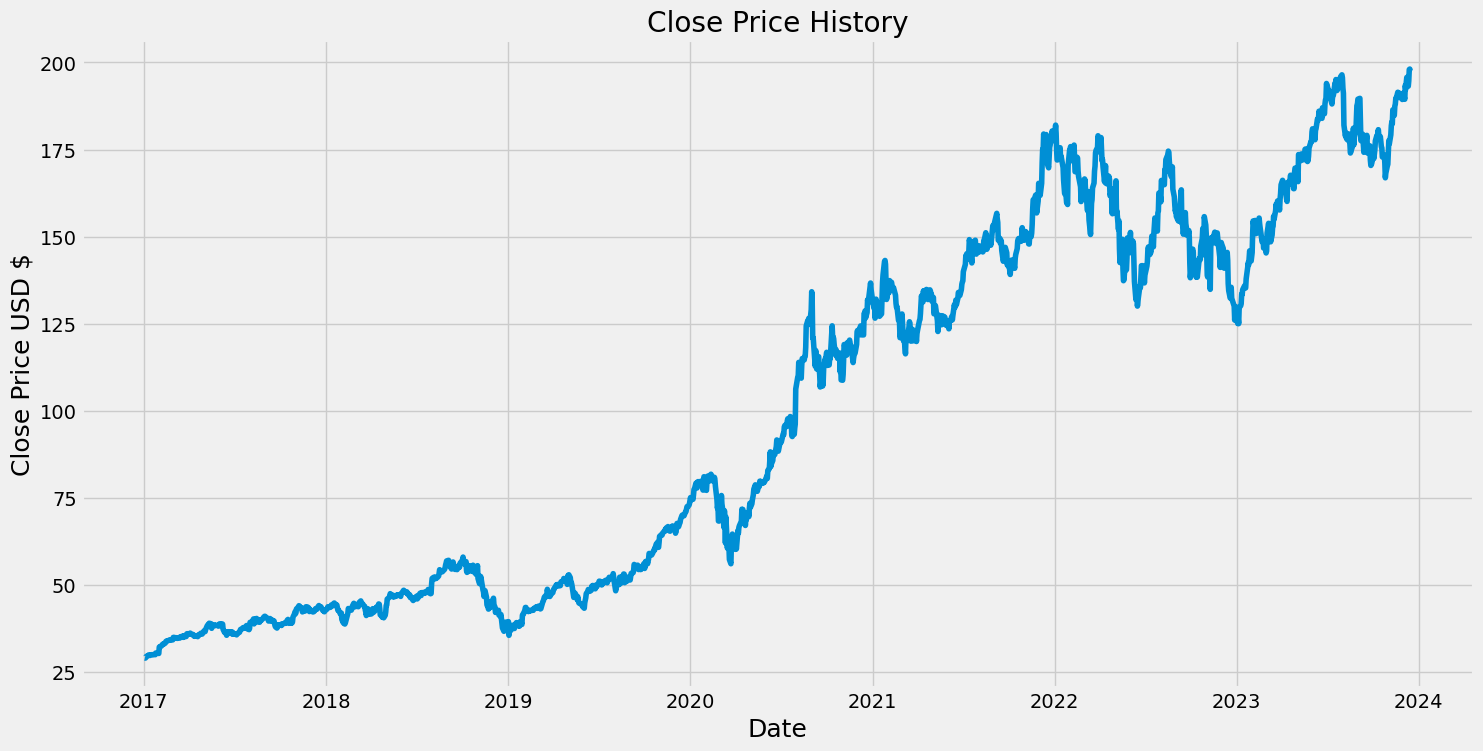

In [153]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD $', fontsize = 18)
plt.show()

In [154]:
# Creating a new dataframe with only the 'Close' column

data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil( len(dataset) * .8)

training_data_len

1401

In [155]:
# Scaling the data

In [156]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


for i in scaled_data:
    print(i)

[0.0001922]
[0.]
[0.00087224]
[0.00279413]
[0.00439076]
[0.00456817]
[0.00551433]
[0.00477514]
[0.00446469]
[0.00588392]
[0.00586914]
[0.00555868]
[0.00588392]
[0.0060022]
[0.00583957]
[0.00866326]
[0.00875197]
[0.00876674]
[0.00829366]
[0.00787972]
[0.01881967]
[0.01849443]
[0.01930754]
[0.02109636]
[0.02292954]
[0.02368351]
[0.02424529]
[0.02380178]
[0.02553147]
[0.02808907]
[0.02881346]
[0.02857693]
[0.02912392]
[0.03057272]
[0.03117886]
[0.0303214]
[0.0305136]
[0.03091274]
[0.03100146]
[0.03514088]
[0.03391386]
[0.03512611]
[0.03447562]
[0.03474174]
[0.03397298]
[0.03349989]
[0.03417995]
[0.03426865]
[0.0339582]
[0.03613141]
[0.03647143]
[0.03543658]
[0.03760978]
[0.03521481]
[0.03755064]
[0.03681145]
[0.03639751]
[0.03675233]
[0.04106917]
[0.04154223]
[0.04126134]
[0.0408622]
[0.04092132]
[0.04250319]
[0.04139441]
[0.0408622]
[0.04038911]
[0.04013779]
[0.0378611]
[0.03811242]
[0.03700365]
[0.03815677]
[0.03722539]
[0.03645663]
[0.03905858]
[0.03880726]
[0.04083262]
[0.04214837]
[0

In [157]:
train_data = scaled_data[0:training_data_len, :]
#Split the data
x_train = []
y_train = []


for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i <=61:
        print(x_train)
        print(y_train)
        print()

[array([0.0001922 , 0.        , 0.00087224, 0.00279413, 0.00439076,
       0.00456817, 0.00551433, 0.00477514, 0.00446469, 0.00588392,
       0.00586914, 0.00555868, 0.00588392, 0.0060022 , 0.00583957,
       0.00866326, 0.00875197, 0.00876674, 0.00829366, 0.00787972,
       0.01881967, 0.01849443, 0.01930754, 0.02109636, 0.02292954,
       0.02368351, 0.02424529, 0.02380178, 0.02553147, 0.02808907,
       0.02881346, 0.02857693, 0.02912392, 0.03057272, 0.03117886,
       0.0303214 , 0.0305136 , 0.03091274, 0.03100146, 0.03514088,
       0.03391386, 0.03512611, 0.03447562, 0.03474174, 0.03397298,
       0.03349989, 0.03417995, 0.03426865, 0.0339582 , 0.03613141,
       0.03647143, 0.03543658, 0.03760978, 0.03521481, 0.03755064,
       0.03681145, 0.03639751, 0.03675233, 0.04106917, 0.04154223])]
[0.0412613402818775]

[array([0.0001922 , 0.        , 0.00087224, 0.00279413, 0.00439076,
       0.00456817, 0.00551433, 0.00477514, 0.00446469, 0.00588392,
       0.00586914, 0.00555868, 0.005

In [158]:
# Converting data into numpy arrays

In [159]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [160]:
# Reshape the data

In [161]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))
x_train.shape

(1341, 60, 1)

In [162]:
# Buidl LSTM Model

In [163]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [164]:
# Complie the model

In [165]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [166]:
# Traning the model

In [167]:
model.fit(x_train,y_train, batch_size=1, epochs=1)

1341/1341 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - loss: 0.0065


In [168]:
# Create the testing data set

In [169]:
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [170]:
x_test = np.array(x_test)

In [171]:
# Reshape the data (getting 3 dimensional becase LSTM works on 3 dimensional)

In [172]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [173]:
# Get the models predictive price values

In [174]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


In [175]:
# get the root mena square error (RMSE)

In [176]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

6.950149775913784

In [177]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions


C:\Users\ASUS\AppData\Local\Temp\ipykernel_23104\3846301319.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


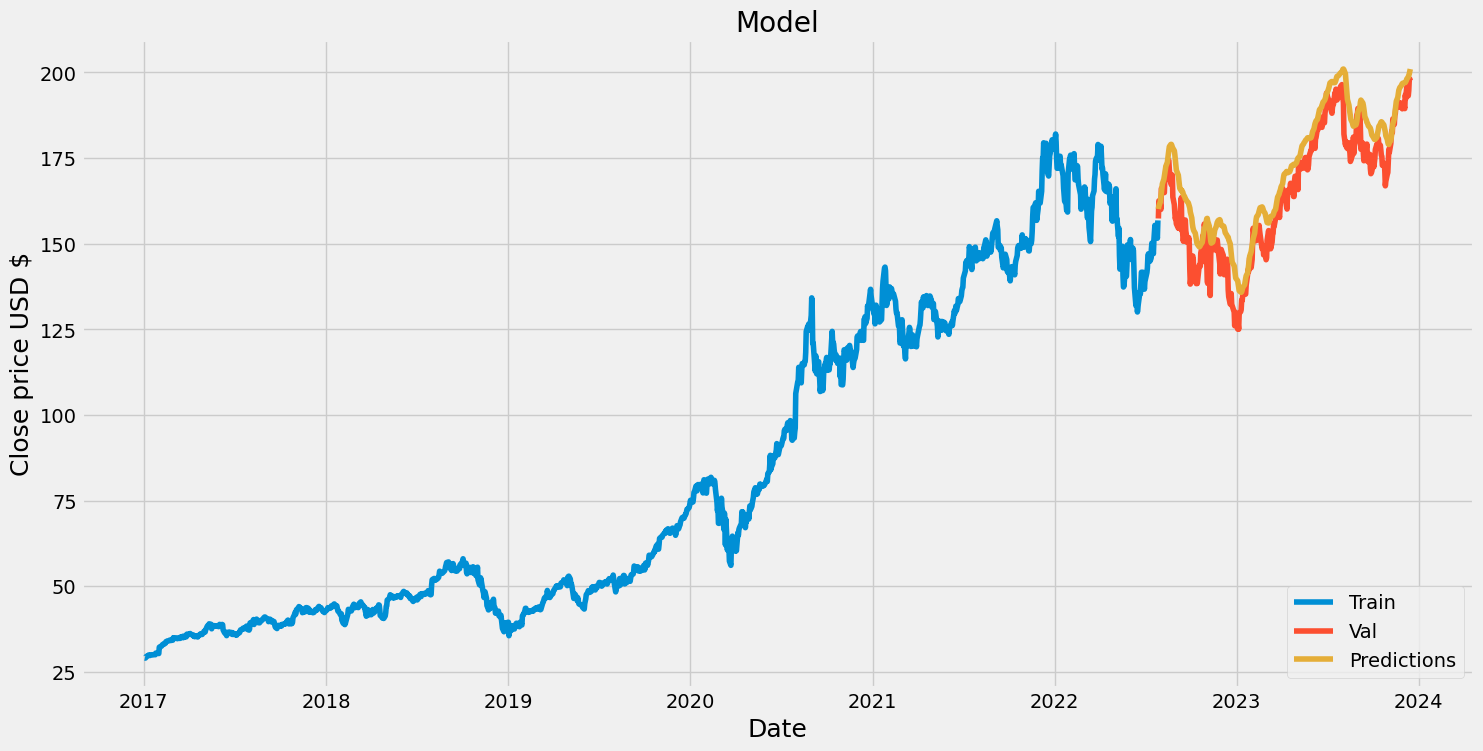

In [179]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close price USD $', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [180]:
valid

,Close,Predictions
Date,,
2022-07-28,157.350006,160.103958
2022-07-29,162.509995,160.957382
2022-08-01,161.509995,162.240784
2022-08-02,160.009995,163.552582
2022-08-03,166.130005,164.647461
...,...,...
2023-12-11,193.179993,198.684143
2023-12-12,194.710007,199.118958
2023-12-13,197.960007,199.560165


In [199]:
import yfinance as yf
import datetime

# Define the ticker symbol for Apple Inc.
ticker = "AAPL"

# Define the date range
start_date = datetime.datetime(2017, 1, 1)
end_date = datetime.datetime(2023, 12, 17)

# Get the data
df2 = yf.download(ticker, start=start_date, end=end_date)




[*********************100%%**********************]  1 of 1 completed


In [200]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler



# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Filter the 'Close' column
new_df = df2.filter(['Close'])

# Get the last 60 days of data
last_60_days = new_df[-60:].values

# Check if last_60_days is not empty
if len(last_60_days) > 0:
    last_60_days_scaled = scaler.fit_transform(last_60_days.reshape(-1, 1))

    X_test = []
    X_test.append(last_60_days_scaled)
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Assuming 'model' is your trained model
    pred_price = model.predict(X_test)

    pred_price = scaler.inverse_transform(pred_price)
    print(pred_price)
else:
    print("Not enough data for prediction")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[196.36035]]


In [206]:
start_date = datetime.datetime(2023, 12, 18)
end_date = datetime.datetime(2023, 12, 19)


df3 = yf.download(ticker, start=start_date, end=end_date)
df3['Close']




[*********************100%%**********************]  1 of 1 completed


Date
2023-12-18    195.889999
Name: Close, dtype: float64